# Imports and loads

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_excel('Documents\loons sub tracking.xlsx')

In [3]:
data.describe(include=[np.object])

,Opponent,Final,Result,Sub on,Sub Off,Score at sub,Forwards,Midfieldsers,Defenders
count,224,224,224,224,224,224,13,13,18
unique,23,27,3,39,35,24,13,13,18
top,SKC,2-3,Loss,Danladi,Ramirez,0-2,Kadrii,Warner,Manley
freq,18,23,116,31,21,38,1,1,1


In [14]:
data.describe(include=[np.number])

,time,sub_#,movement,score_change,on_index,off_index,end_diff,sub_diff,loon_score,opp_score
count,224.000000,224.000000,224.000000,224.00000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,70.187500,1.888393,-0.031250,-0.09375,1.285714,1.316964,-0.473214,-0.379464,1.071429,1.450893
std,15.588331,0.792934,0.924944,0.93519,0.780118,0.764972,1.831267,1.597006,1.145976,1.111416
min,8.000000,1.000000,-2.000000,-3.00000,0.000000,0.000000,-5.000000,-4.000000,0.000000,0.000000
25%,64.000000,1.000000,-0.250000,-1.00000,1.000000,1.000000,-2.000000,-2.000000,0.000000,1.000000
50%,75.000000,2.000000,0.000000,0.00000,1.000000,1.500000,-1.000000,-1.000000,1.000000,1.000000
75%,81.000000,3.000000,0.000000,0.00000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000
max,90.000000,3.000000,2.000000,4.00000,2.000000,2.000000,4.000000,4.000000,5.000000,5.000000


# Cleaning

In [5]:
data.columns = map(str.lower, data.columns)

In [6]:
data.columns = data.columns.str.replace(' ','_')

In [7]:
data = data.drop('unnamed:_15', axis=1)

In [8]:
data['sub_gamestate']='draw'

In [9]:
data['loon_score'] = data['score_at_sub'].str[0]
data['opp_score'] = data['score_at_sub'].str[2]

In [10]:
data[['loon_score','opp_score']] = data[['loon_score','opp_score']].apply(pd.to_numeric)

In [11]:
data['sub_gamestate'] = np.where(data['loon_score']>data['opp_score'],'Win',
                                 np.where(data['loon_score']<data['opp_score'],'Loss','Draw'))

In [12]:
data['sub_diff'] = data.loon_score - data.opp_score

In [13]:
data.head()

,date,opponent,final,result,time,sub_#,sub_on,sub_off,movement,score_at_sub,...,on_index,off_index,end_diff,sub_diff,forwards,midfieldsers,defenders,sub_gamestate,loon_score,opp_score
0,2019-05-29,Atlanta,0-3,Loss,64,1,Toye,Danladi,0,0-1,...,2,2,-3,-1,Quintero,Ibarra,Opara,Loss,0,1
1,2019-05-29,Atlanta,0-3,Loss,70,2,Rodriguez,Quintero,0,0-1,...,2,2,-3,-1,Rodriguez,Schuller,Kallman,Loss,0,1
2,2019-05-29,Atlanta,0-3,Loss,82,3,Finlay,Schuller,1,0-1,...,2,1,-3,-1,Danladi,Heath,Miller,Loss,0,1
3,2018-07-15,RSL,3-2,Win,72,1,Martin,Ibson,0,3-0,...,1,1,1,3,Romario,Fernando,Thiesson,Win,3,0
4,2018-07-15,RSL,3-2,Win,78,2,Fernando,Schuller,0,3-1,...,1,1,1,2,Molino,Maximiano,Gomez,Win,3,1


In [95]:
data['sub_diff'].value_counts()

-1    53
-2    49
 0    41
 1    39
 2    20
-3    10
 3     7
-4     3
 4     2
Name: sub_diff, dtype: int64

In [96]:
data.groupby(['result'])['sub_diff'].value_counts()

result  sub_diff
Draw     0          19
        -1           7
        -2           3
         1           1
Loss    -2          46
        -1          43
         0          11
        -3          10
        -4           3
         1           3
Win      1          35
         2          20
         0          11
         3           7
        -1           3
         4           2
Name: sub_diff, dtype: int64

# split dataset

In [15]:
    # break out player types, substitutions, and results

In [16]:
defenders = data.defenders
mid = data.midfieldsers
attack = data.forwards

In [17]:
subs = data.drop(['forwards','midfieldsers','defenders'], axis=1)

In [18]:
results = data[['date','opponent','final','result','sub_#']]

# Clean results dataframeto remove duplicates and count subs

In [19]:
results['max_sub'] = results.groupby(['date','opponent','final','result'])['sub_#'].transform(max)

c:\users\zak_laptop\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
results = results.drop('sub_#', axis=1)

In [21]:
results = results.drop_duplicates()

In [22]:
results['date'] = pd.to_datetime(results['date'])

In [23]:
subs['date']= pd.to_datetime(subs['date'])

In [24]:
subs['year'] = subs['date'].dt.year

In [25]:
results.describe(include=[np.object])

,opponent,final,result
count,84,84,84
unique,23,27,3
top,Galaxy,2-3,Loss
freq,6,8,45


In [26]:
subs[['time', 'sub_#', 'movement','score_change','on_index','off_index','loon_score','opp_score']].describe(include=[np.number])

,time,sub_#,movement,score_change,on_index,off_index,loon_score,opp_score
count,224.000000,224.000000,224.000000,224.00000,224.000000,224.000000,224.000000,224.000000
mean,70.187500,1.888393,-0.031250,-0.09375,1.285714,1.316964,1.071429,1.450893
std,15.588331,0.792934,0.924944,0.93519,0.780118,0.764972,1.145976,1.111416
min,8.000000,1.000000,-2.000000,-3.00000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,1.000000,-0.250000,-1.00000,1.000000,1.000000,0.000000,1.000000
50%,75.000000,2.000000,0.000000,0.00000,1.000000,1.500000,1.000000,1.000000
75%,81.000000,3.000000,0.000000,0.00000,2.000000,2.000000,2.000000,2.000000
max,90.000000,3.000000,2.000000,4.00000,2.000000,2.000000,5.000000,5.000000


# EDA

In [27]:
results['year'] = results['date'].dt.year

In [28]:
#Average # subs used per game
results.groupby(['year']).mean()

,max_sub
year,
2017,2.588235
2018,2.705882
2019,2.750000


In [29]:
data.columns

Index(['date', 'opponent', 'final', 'result', 'time', 'sub_#', 'sub_on',
       'sub_off', 'movement', 'score_at_sub', 'score_change', 'on_index',
       'off_index', 'end_diff', 'sub_diff', 'forwards', 'midfieldsers',
       'defenders', 'sub_gamestate', 'loon_score', 'opp_score'],
      dtype='object')

In [30]:
data.groupby(['result','sub_gamestate']).sub_gamestate.count()

result  sub_gamestate
Draw    Draw              19
        Loss              10
        Win                1
Loss    Draw              11
        Loss             102
        Win                3
Win     Draw              11
        Loss               3
        Win               64
Name: sub_gamestate, dtype: int64

In [31]:
#average # subs by result
results.groupby(['result']).mean()

,max_sub,year
result,,
Draw,2.500000,2017.750000
Loss,2.577778,2017.755556
Win,2.888889,2017.851852


In [32]:
#average # subs by year and result
results.groupby(['year','result']).mean()

max_sub
year result          
2017 Draw    2.500000
     Loss    2.444444
     Win     2.900000
2018 Draw    2.333333
     Loss    2.700000
     Win     2.818182
2019 Draw    2.666667
     Loss    2.571429
     Win     3.000000

In [33]:
#subs made before halftime are removed as they are not necessarily made tactically, but still count agaisnt the 3 allowed
subs_no_injury = subs.drop(subs[(subs.time < 45)].index)

In [34]:
#average time of subs
subs.groupby(['sub_#'])['time'].mean()

sub_#
1    59.297619
2    73.061728
3    81.745763
Name: time, dtype: float64

In [35]:
#average time of subs excluding first half injuries
subs_no_injury.groupby(['sub_#'])['time'].mean()

sub_#
1    64.857143
2    73.425000
3    81.745763
Name: time, dtype: float64

In [36]:
#Average time of sub by result
subs.groupby(['sub_gamestate','sub_#'])['time','movement'].mean()

time  movement
sub_gamestate sub_#                     
Draw          1      50.000000 -0.411765
              2      73.785714 -0.214286
              3      83.300000 -0.400000
Loss          1      58.250000  0.295455
              2      69.627907  0.186047
              3      78.285714  0.464286
Win           1      68.173913 -0.434783
              2      78.791667 -0.166667
              3      85.619048 -0.619048

In [37]:
#Average time of sub by result excluding first half injuries
subs_no_injury.groupby(['sub_gamestate'])['time','movement'].mean()

,time,movement
sub_gamestate,,
Draw,74.235294,-0.382353
Loss,69.155963,0.321101
Win,78.409091,-0.393939


# changes in games due to subs

In [38]:
#end state and sub state must be different
gamechanges= subs.drop(subs[(subs.result==subs.sub_gamestate)].index)

In [39]:
#positive subs don't end in a loss
possubs = gamechanges.drop(gamechanges[(gamechanges.result == 'Loss')].index)

In [40]:
#positive can't have come on when we're winning
possubs = possubs.drop(possubs[(possubs.sub_gamestate == 'Win')].index)

In [41]:
#number of total subs leading to gained points
len(possubs.index)

24

In [42]:
#inverse process for negative changes

In [43]:
negsubs = gamechanges.drop(gamechanges[(gamechanges.result == 'Win')].index)

In [44]:
negsubs = negsubs.drop(negsubs[(negsubs.sub_gamestate =='Loss')].index)

In [45]:
#total number of subs leading to lost points
len(negsubs.index)

15

# find points earned from subs made, max points taken per game

In [46]:
possubs['end_points'] = np.where(possubs['result'] == 'Win',3,1)
possubs['sub_points'] = np.where(possubs['sub_gamestate'] == 'Draw',1,0)

In [47]:
possubs['points_gained'] = possubs['end_points'] - possubs['sub_points']

In [48]:
points_from_subs = possubs[['date','points_gained']]

In [49]:
len(points_from_subs.index)

24

In [50]:
points_from_subs.sort_values('points_gained', ascending=False).drop_duplicates('date').sort_index()

,date,points_gained
17,2019-04-28,2
57,2018-09-16,1
67,2018-08-12,1
74,2018-07-23,2
108,2018-04-29,3
127,2018-03-11,2
141,2017-10-08,1
144,2017-10-04,3
151,2017-09-17,2
156,2017-08-27,2


In [51]:
points_from_subs.points_gained.sum()

41

In [100]:
points_gained_time = points_from_subs.merge(subs_no_injury, on='date')

In [109]:
points_gained_time.groupby('date')['movement','time'].mean()

,movement,time
date,,
2017-03-19,0.000000,61.333333
2017-04-16,0.000000,90.000000
2017-04-23,-0.333333,78.333333
2017-06-25,0.000000,66.000000
2017-08-27,-1.500000,81.500000
2017-09-17,0.333333,75.000000
2017-10-04,0.666667,73.333333
2017-10-08,1.000000,79.666667
2018-03-11,-0.666667,63.000000


In [111]:
points_gained_time.movement.mean()

0.03333333333333333

## find total points lost on bad subs

In [52]:
negsubs['end_points'] = np.where(negsubs['result'] == 'Draw',1,0)
negsubs['sub_points'] = np.where(negsubs['sub_gamestate'] == 'Win',3,1)

In [53]:
negsubs['points_lost'] = negsubs['end_points'] - negsubs['sub_points']

In [54]:
lost_points_from_subs = negsubs[['date','points_lost']]

In [55]:
lost_points_from_subs.sort_values('points_lost', ascending=False).drop_duplicates('date').sort_index()

,date,points_lost
25,2019-04-13,-2
58,2018-09-13,-1
61,2018-08-26,-1
69,2018-08-05,-3
90,2018-06-24,-1
159,2017-08-21,-1
172,2017-07-04,-1
180,2017-06-18,-1
181,2017-06-03,-1
188,2017-05-21,-1


In [56]:
lost_points_from_subs.points_lost.sum()

-22

In [102]:
points_lost_time = lost_points_from_subs.merge(subs_no_injury, on='date')

In [108]:
points_lost_time.groupby('date')['movement','time'].mean()

,movement,time
date,,
2017-05-21,-1.000000,78.000000
2017-06-03,1.000000,59.000000
2017-06-18,-1.000000,79.000000
2017-07-04,1.000000,77.000000
2017-08-21,-1.000000,83.000000
2018-06-24,-0.666667,76.666667
2018-08-05,0.000000,57.500000
2018-08-26,0.500000,71.000000
2018-09-13,0.000000,77.500000


In [107]:
points_lost_time.movement.mean()

-0.37142857142857144

# most subs on and off

In [57]:
subs.sub_on.value_counts().nlargest(5)

Danladi    31
Warner     16
Toye       16
Ibarra     14
Martin     12
Name: sub_on, dtype: int64

In [58]:
subs.sub_off.value_counts().nlargest(5)

Ramirez     21
Schuller    20
Ibarra      20
Danladi     17
Molino      15
Name: sub_off, dtype: int64

In [59]:
subs['sub_combo'] = subs['sub_on'] + subs['sub_off']

In [60]:
subs.sub_combo.value_counts().nlargest(5)

ToyeRamirez         8
DanladiRamirez      6
WarnerIbson         4
WarnerMartin        4
DanladiRodriguez    4
Name: sub_combo, dtype: int64

# movement by gamestate and results

In [61]:
subs.sub_gamestate.value_counts(normalize=True)

Loss    0.513393
Win     0.303571
Draw    0.183036
Name: sub_gamestate, dtype: float64

In [62]:
results.result.value_counts(normalize=True)

Loss    0.535714
Win     0.321429
Draw    0.142857
Name: result, dtype: float64

In [63]:
subs.groupby(['year','sub_gamestate'])['movement'].mean()

year  sub_gamestate
2017  Draw            -0.350000
      Loss             0.173913
      Win             -0.545455
2018  Draw            -0.461538
      Loss             0.450980
      Win             -0.250000
2019  Draw            -0.125000
      Loss             0.166667
      Win             -0.444444
Name: movement, dtype: float64

In [64]:
subs.groupby(['year','result'])['movement'].mean()

year  result
2017  Draw      0.066667
      Loss     -0.068182
      Win      -0.310345
2018  Draw      0.142857
      Loss      0.351852
      Win      -0.322581
2019  Draw     -0.125000
      Loss      0.166667
      Win      -0.444444
Name: movement, dtype: float64

In [65]:
subs['sub_type'] = np.where(subs['movement']>0,'attacking',np.where(subs['movement']<0,'defending','neutral'))

# scatter points gained vs sub movement

In [66]:
#running again to add new columns
subs_no_injury = subs.drop(subs[(subs.time < 45)].index)

In [67]:
avg_score_change = subs_no_injury.groupby(['date'])['score_change'].mean()

In [68]:
avg_movement = subs_no_injury.groupby(['date','opponent'])['movement'].mean()

In [69]:
results = results.merge(avg_score_change, on='date')

In [70]:
results = results.merge(avg_movement, on='date')

In [71]:
results.head()

,date,opponent,final,result,max_sub,year,score_change,movement
0,2019-05-29,Atlanta,0-3,Loss,3,2019,-2.0,0.333333
1,2018-07-15,RSL,3-2,Win,3,2018,-1.0,0.000000
2,2019-05-25,Houston,1-0,Win,3,2019,0.0,-0.666667
3,2019-05-19,Columbus,1-0,Win,3,2019,0.0,-1.000000
4,2019-05-12,Chicago,0-2,Loss,3,2019,0.0,1.000000


Text(0,0.5,'score change')

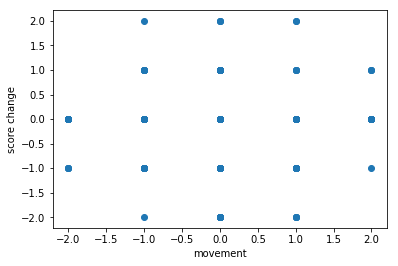

In [72]:
plt.scatter(subs_no_injury.movement, subs_no_injury.score_change)
plt.xlabel('movement')
plt.ylabel('score change')

Text(0,0.5,'score change')

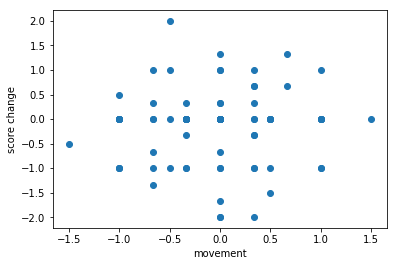

In [73]:
plt.scatter(results.movement, results.score_change)
plt.xlabel('movement')
plt.ylabel('score change')

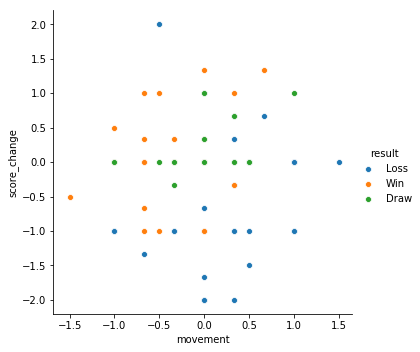

In [74]:
sns.pairplot(x_vars=['movement'], y_vars=['score_change'], data=results, hue='result', height = 5)

# risk aversions results

In [75]:
#every sub made during a draw
draw_only = subs_no_injury.loc[subs_no_injury['sub_gamestate'] == 'Draw']

In [76]:
draw_subtime = draw_only.groupby(['date'])['time'].mean()
draw_movement = draw_only.groupby(['date'])['movement'].mean()

In [77]:
draw_only.head()

,date,opponent,final,result,time,sub_#,sub_on,sub_off,movement,score_at_sub,...,on_index,off_index,end_diff,sub_diff,sub_gamestate,loon_score,opp_score,year,sub_combo,sub_type
15,2019-05-04,Seattle,1-1,Draw,68,1,Romario,Finlay,0,1-1,...,2,2,0,0,Draw,1,1,2019,RomarioFinlay,neutral
16,2019-05-04,Seattle,1-1,Draw,76,2,Quintero,Schuller,1,1-1,...,2,1,0,0,Draw,1,1,2019,QuinteroSchuller,attacking
17,2019-04-28,DC,1-0,Win,51,1,Ibarra,Quintero,-1,0-0,...,1,2,1,0,Draw,0,0,2019,IbarraQuintero,defending
20,2019-04-25,Galaxy,0-0,Draw,61,1,Ibarra,Molino,-1,0-0,...,1,2,0,0,Draw,0,0,2019,IbarraMolino,defending
21,2019-04-25,Galaxy,0-0,Draw,78,2,Romario,Rodriguez,0,0-0,...,2,2,0,0,Draw,0,0,2019,RomarioRodriguez,neutral


In [78]:
draw_results = draw_only[['date','opponent','final','result','sub_#']]

In [79]:
draw_results['max_sub'] = draw_results.groupby(['date','opponent','final','result'])['sub_#'].transform(max)

c:\users\zak_laptop\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
draw_results = draw_results.drop('sub_#', axis=1)


In [81]:
draw_results = draw_results.drop_duplicates()

In [112]:
draw_results = draw_results.merge(draw_subtime, on='date')

In [113]:
draw_results = draw_results.merge(draw_movement, on='date')

In [114]:
draw_results.result.value_counts()

Draw    10
Win      5
Loss     4
Name: result, dtype: int64

In [115]:
draw_results.groupby([draw_results.result])['max_sub'].mean()

result
Draw    2.60
Loss    2.25
Win     2.00
Name: max_sub, dtype: float64

In [116]:
draw_results.head()

,date,opponent,final,result,max_sub,time,movement
0,2019-05-04,Seattle,1-1,Draw,2,72.000000,0.500000
1,2019-04-28,DC,1-0,Win,1,51.000000,-1.000000
2,2019-04-25,Galaxy,0-0,Draw,3,75.333333,-0.333333
3,2019-04-13,NYCFC,3-3,Draw,3,81.000000,0.000000
4,2018-08-12,Galaxy,2-2,Draw,3,87.000000,-2.000000


In [117]:
draw_results.groupby([draw_results.result])['time'].mean()

result
Draw    75.566667
Loss    80.750000
Win     64.400000
Name: time, dtype: float64

In [118]:
draw_results.groupby([draw_results.result])['movement'].mean()

result
Draw   -0.300000
Loss   -1.000000
Win    -0.466667
Name: movement, dtype: float64